# House Prices Prediction

## Project Description
In this project, we aim to predict the sale prices of houses using various features such as their size, location, and number of rooms. The dataset includes missing values and some incorrectly formatted data, which will allow us to demonstrate advanced data cleaning and preprocessing techniques. We will build and evaluate a regression model to make accurate price predictions.


## Dataset Description
The dataset used in this project is sourced from the Kaggle competition "House Prices: Advanced Regression Techniques". It includes 79 explanatory variables describing various aspects of residential homes in Ames, Iowa.

- **Id:** Unique identifier
- **MSSubClass:** The building class
- **MSZoning:** The general zoning classification
- **LotFrontage:** Linear feet of street connected to property
- **LotArea:** Lot size in square feet
- **Street:** Type of road access
- **Alley:** Type of alley access
- **LotShape:** General shape of property
- **LandContour:** Flatness of the property
- **Utilities:** Type of utilities available
- **...**
- **SalePrice:** The property's sale price (target variable)


## Data Loading and Initial Exploration
First, we will load the dataset and perform initial exploration to understand its structure and identify any missing or incorrectly formatted values.

In [32]:
import pandas as pd
import os

# Load the dataset
path = r"C:\Users\hassa\OneDrive\المستندات\Machine learning files\house-prices-advanced-regression-techniques\train.csv"
df = pd.read_csv(path)

# Display the first few rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
# Check for missing values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Data Cleaning and Preprocessing
We will handle missing values, incorrect formats, and encode categorical variables to prepare the dataset for modeling.

In [35]:
# Handling missing values
# Fill missing LotFrontage values with the median value
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

# Dropping columns with a high percentage of missing values
df = df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

In [36]:
# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [37]:
# Splitting the data into features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [38]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Exploratory Data Analysis (EDA)
We will create visualizations to explore the relationships between different features and the target variable.

<IPython.core.display.Javascript object>


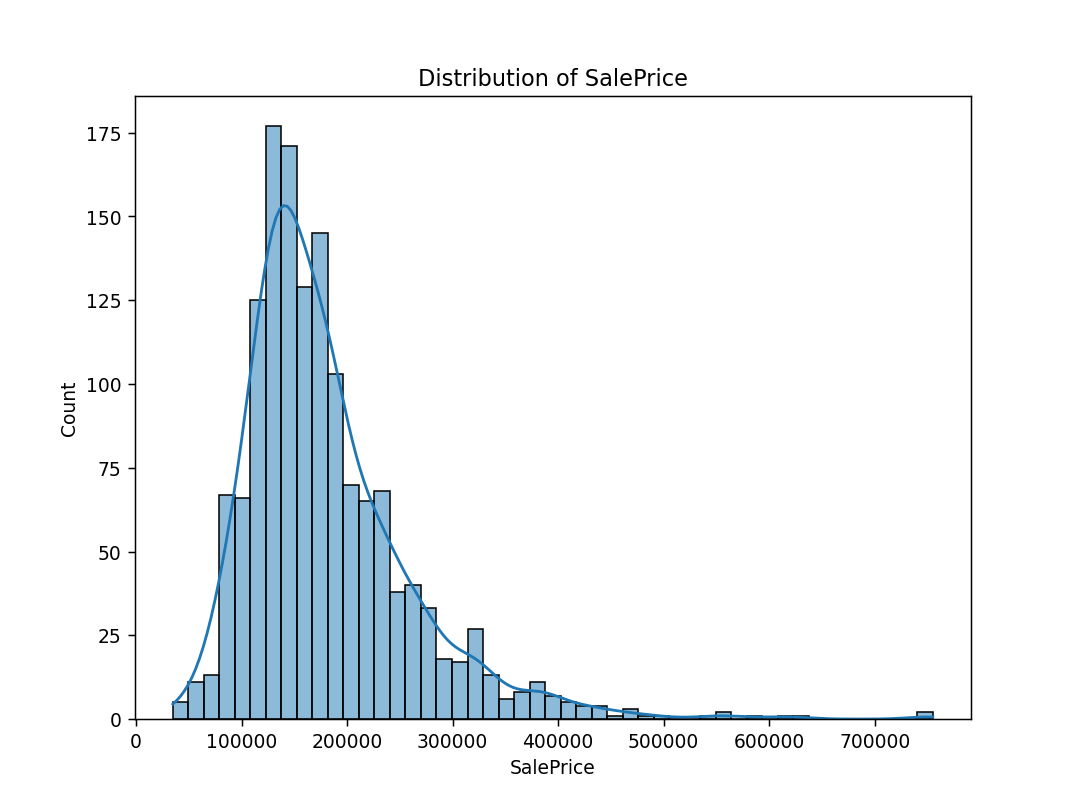

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

# Distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()
plt.savefig('hist_plot.png', dpi=300)

<IPython.core.display.Javascript object>


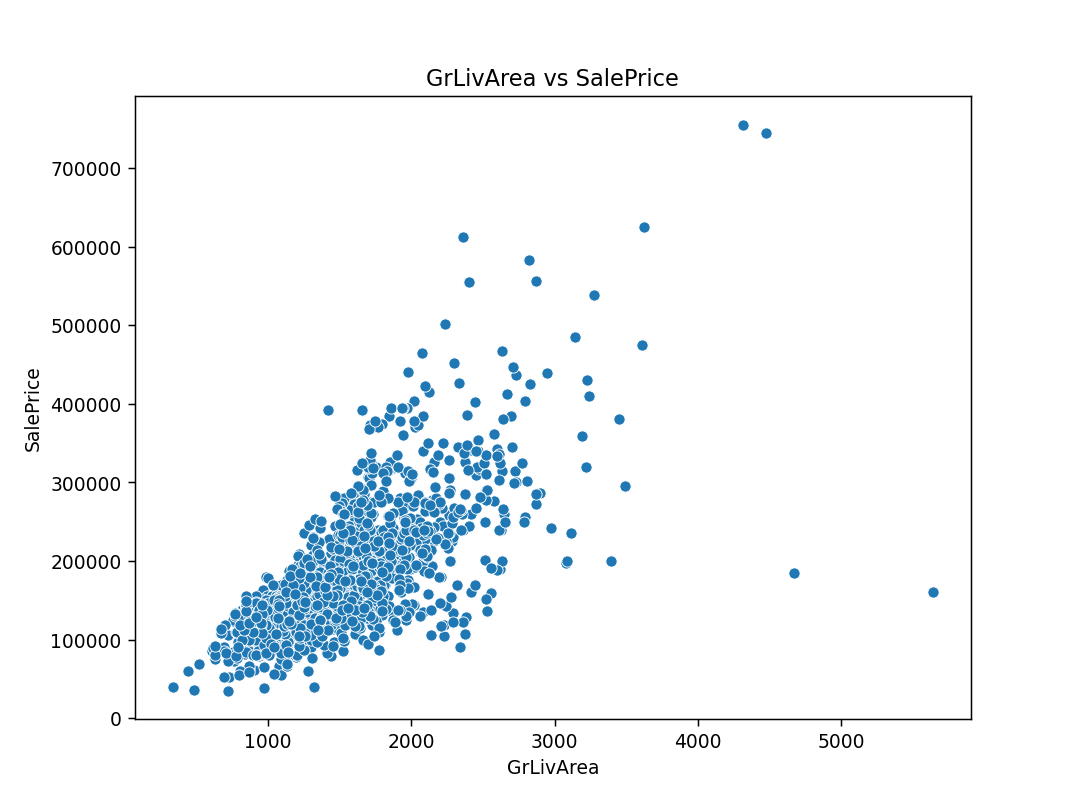

In [40]:
# Scatter plot of GrLivArea vs SalePrice
plt.clf
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.show()
plt.savefig('scatter.png', dpi=300)

<IPython.core.display.Javascript object>


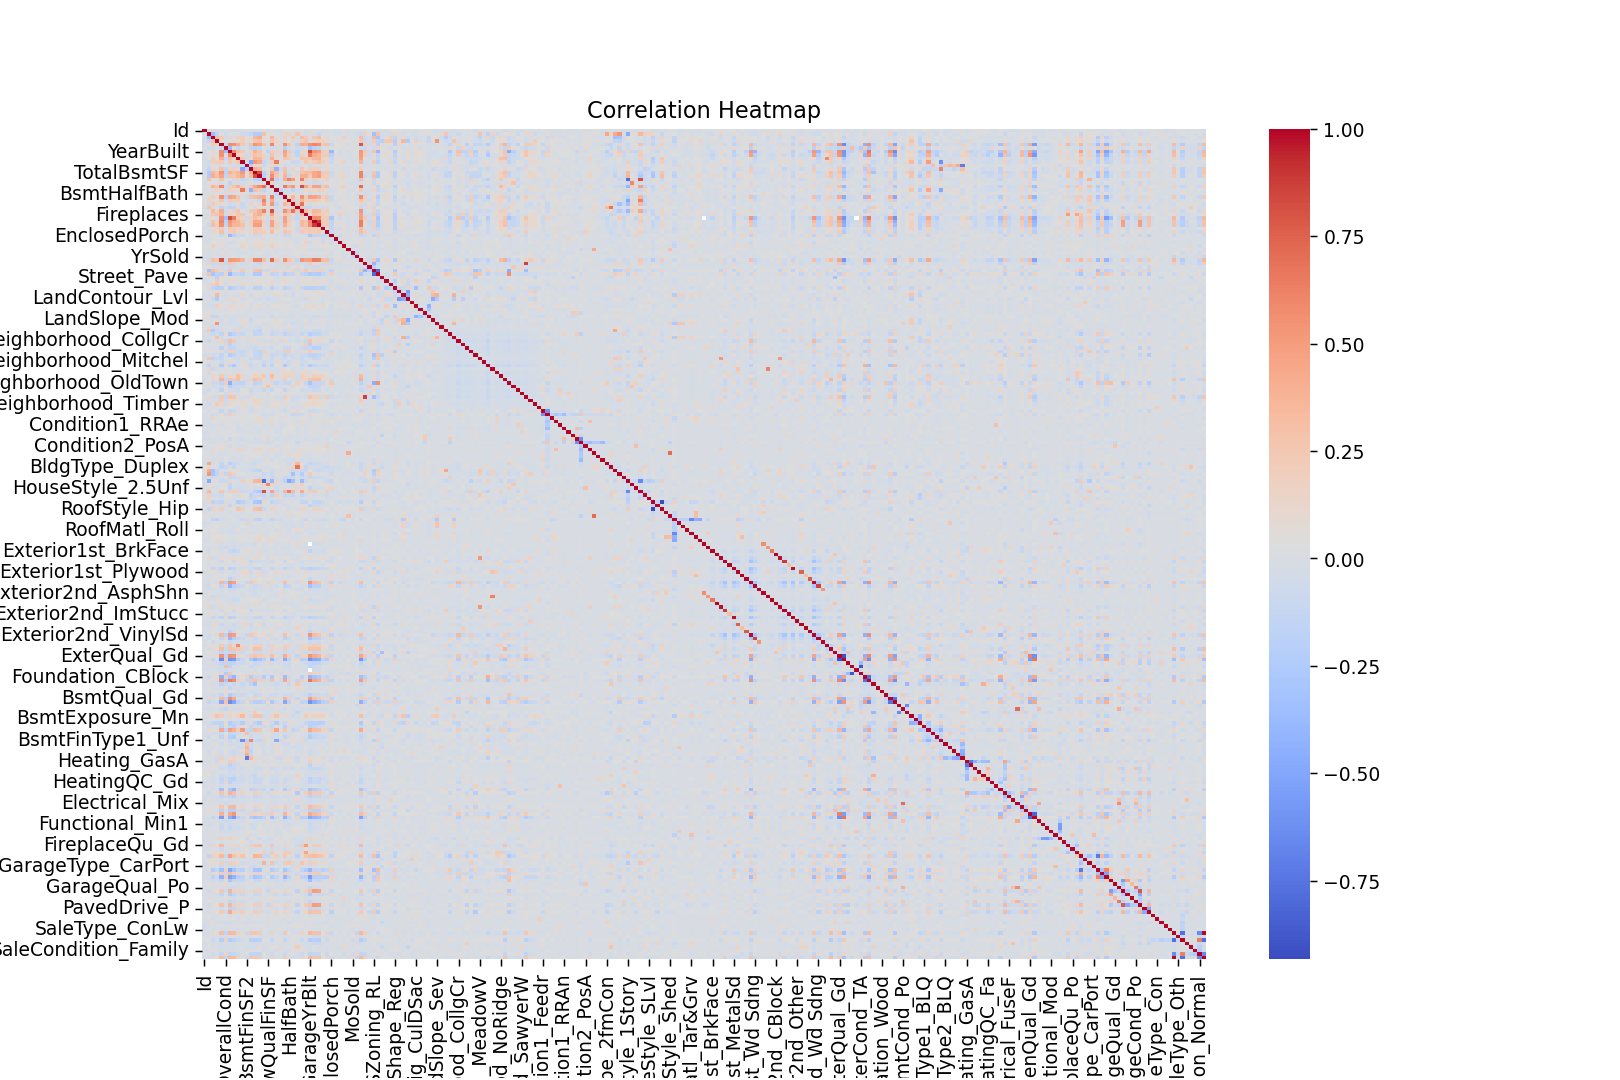

In [41]:
# Heatmap of correlations
plt.clf
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('heat.png', dpi=300)

## Feature Engineering
We will create new features and select the most important ones to improve model performance.

In [42]:
# Creating a new feature 'TotalSF' which is the total square footage
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Feature selection using correlation
correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix['SalePrice']) > 0.5]
selected_features = df[high_corr_features].columns

# Updating the features and target
X = df[selected_features].drop('SalePrice', axis=1)
y = df['SalePrice']


In [43]:
from sklearn.impute import SimpleImputer

# Create an imputer object specifying imputation strategy (e.g., mean)
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on training data to learn the statistics
imputer.fit(X_train)

# Transform both training and testing data using the fitted imputer
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Build your model using the imputed data
model.fit(X_train_imputed, y_train)


RandomForestRegressor(random_state=42)

## Model Building and Evaluation
We will build and evaluate a regression model using the selected features.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Build the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_imputed, y_train)

# Make predictions
y_pred = model.predict(X_test_imputed)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')


RMSE: 27166.60
R²: 0.89


## Model Testing with New Data
Testing the model with new arbitrary input values to demonstrate its practical application.

In [46]:
import numpy as np

# Define new input values based on the same feature set used for training
# Using the first row of the training set to ensure consistency
new_input = X_train_imputed[0].reshape(1, -1)

# Predict the SalePrice
new_prediction = model.predict(new_input)
print(f'Predicted SalePrice: {new_prediction[0]:.2f}')

Predicted SalePrice: 181437.27


## Conclusion and Next Steps
- The model achieved an RMSE of 27166.60 and an R² of 0.89, indicating good performance in predicting house prices.
- Key features influencing the predictions include GrLivArea, TotalSF, and OverallQual.
- Next steps include fine-tuning the model, exploring other regression algorithms, and integrating additional data sources for better predictions.